In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

<IPython.core.display.Javascript object>


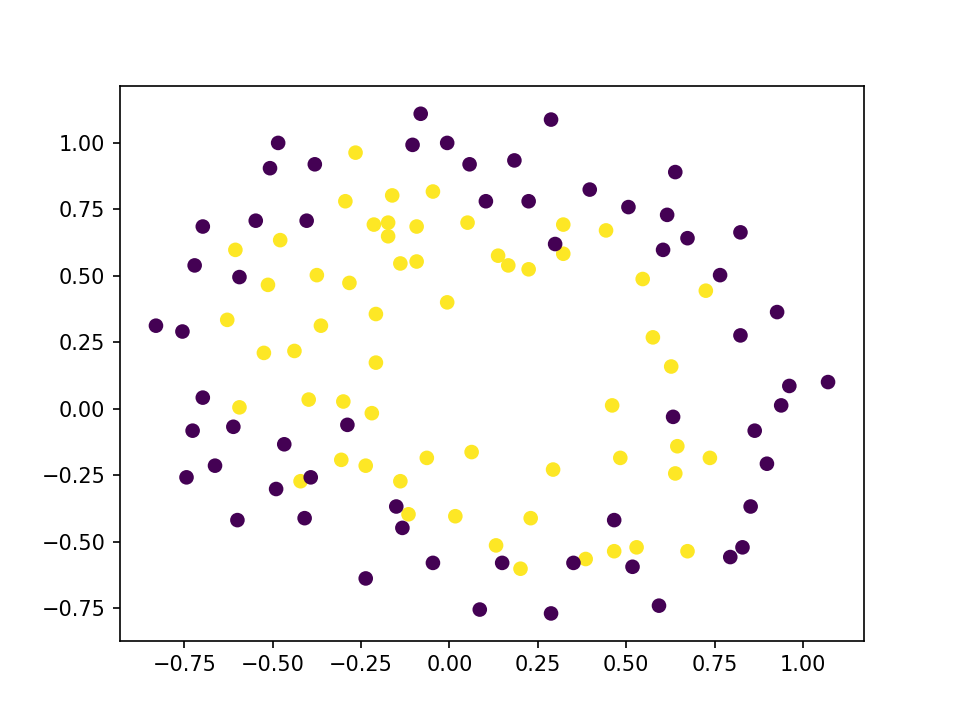

In [2]:
# loading the dataset
data = np.genfromtxt("non_linear.txt", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]

# visualize the dataset
plt.scatter(x_data[:,0], x_data[:, 1], c = y_data)

In [3]:
x_data = data[:,:-1]
y__data = data[:,-1,np.newaxis]
# define the polynomial regression,the features can be adjusted by change the value of degree
poly_reg  = PolynomialFeatures(degree=3) 
# feature transform
x_poly = poly_reg.fit_transform(x_data)

In [4]:
# define the sigmoid function
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

# define the cost funtion
def cost(xMat, yMat, Ws):
    # the cost consists of two parts, y = 1 and y = 0 respectively.
    left = np.multiply(yMat, np.log(sigmoid(xMat * Ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat * Ws)))
    return np.sum(left + right) / - len(xMat)

# define the gradient ascent to adjust the weights
def grad_ascent(xArr, yArr, lr = 0.03, epochs = 50000):
    '''
    input:
        xArr: the features
        yArr: the target variables, 0 or 1
        lr: learning rate
        epochs: the max number of iterations
    
    return:
        the weights
    
    '''
    
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    # define a list to store the cost for every 50 iterations
    costList = []
    # get the number of the rows and cols
    row, col = np.shape(xMat)
    # initialize the weights of 1, col * 1
    Ws = np.mat(np.ones((col, 1)))
    
    for i in range(epochs + 1):
        # calculate the y: row * 1
        h = sigmoid(xMat * Ws)
        # calculate the gradients
        Ws_grad = xMat.T * (h - yMat) / row
        # update the weights
        Ws = Ws - lr * Ws_grad
        
        # record the cost in every 50 iterations
        if i % 50 == 0:
            costList.append(cost(xMat, yMat, Ws))
    
    # return the weighs after iteration
    return Ws, costList

In [5]:
# training the model, get weights and loss 
ws,costList = grad_ascent(x_poly, y__data)
print(ws)

[[ 4.16787292]
 [ 2.72213524]
 [ 4.55120018]
 [-9.76109006]
 [-5.34880198]
 [-8.51458023]
 [-0.55950401]
 [-1.55418165]
 [-0.75929829]
 [-2.88573877]]


<IPython.core.display.Javascript object>


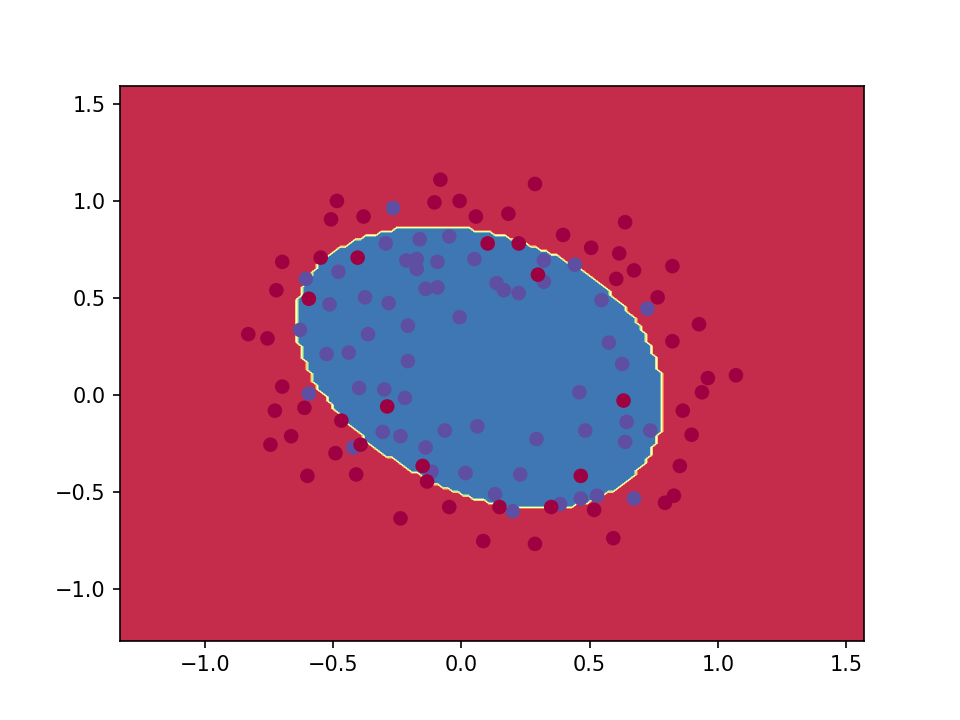

In [6]:
# define a function to plot the decision boundary
def plot_decision_boundary(xArr, y_data, Ws, step = 0.02):
    '''
    input:
        model: the model after fit
        xArr: 2-D dimension dataset
        step: adjust the density of the points
    '''
    xArr = np.array(xArr)
    
    # Set the maxmium and minmium, and give a small boundary
    xMax, xMin = xArr[:, 0].max() + 0.5, xArr[:, 0].min() - 0.5
    yMax, yMin = xArr[:, 1].max() + 0.5, xArr[:, 1].min() - 0.5
    
    # generate the grid for points
    xx, yy = np.meshgrid(np.arange(xMin, xMax, step), np.arange(yMin, yMax, step))
    # generate the predictions by using model and adjust the dimension
    z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(np.array(Ws)))
    z = np.where(z > 0.5, 1, 0)
    z = z.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
    plt.scatter(xArr[:, 0], xArr[:, 1], c = y_data, cmap=plt.cm.Spectral)
    
plot_decision_boundary(x_data, y_data,ws)

In [7]:
# prediction
def predict(x_data, ws):
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(x_poly, ws)
print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85        60
         1.0       0.83      0.86      0.85        58

   micro avg       0.85      0.85      0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.85      0.85      0.85       118



In [8]:
# if there is scaler
x_data = data[:,:-1]
y__data = data[:,-1,np.newaxis]
# define the polynomial regression,the features can be adjusted by change the value of degree
poly_reg  = PolynomialFeatures(degree=3) 
# feature transform
x_poly = poly_reg.fit_transform(x_data)
# scaling the feature 
x_poly = preprocessing.scale(x_poly[:, 1:])
# adding the intersection
x_poly = np.concatenate((np.ones((len(x_poly), 1)), x_poly), axis = 1)

In [9]:
Ws, Loss = grad_ascent(x_poly, y__data)
print(Ws)

[[-0.24803323]
 [ 1.35730451]
 [ 2.51201274]
 [-3.04955934]
 [-1.86029834]
 [-3.25201663]
 [ 0.13318068]
 [ 0.09495683]
 [ 0.39064271]
 [-0.46876783]]


In [10]:
# prediction
def predict(x_data, ws):
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat * ws)]

predictions = predict(x_poly, Ws)
print(classification_report(y__data, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85        60
         1.0       0.83      0.86      0.85        58

   micro avg       0.85      0.85      0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.85      0.85      0.85       118

